In [2]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc10/BHOSS_CODE"
data = "Rhigh_1_incl_10_IMAGE_GRMHD_HAMR3D_SANEA0_640.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9008.689295 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00028428
Total flux = 1.922729 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9146.117533 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.00946501
Total flux = 1.944447 Jy at 230 GHz
147:47:39.030 - Start Program


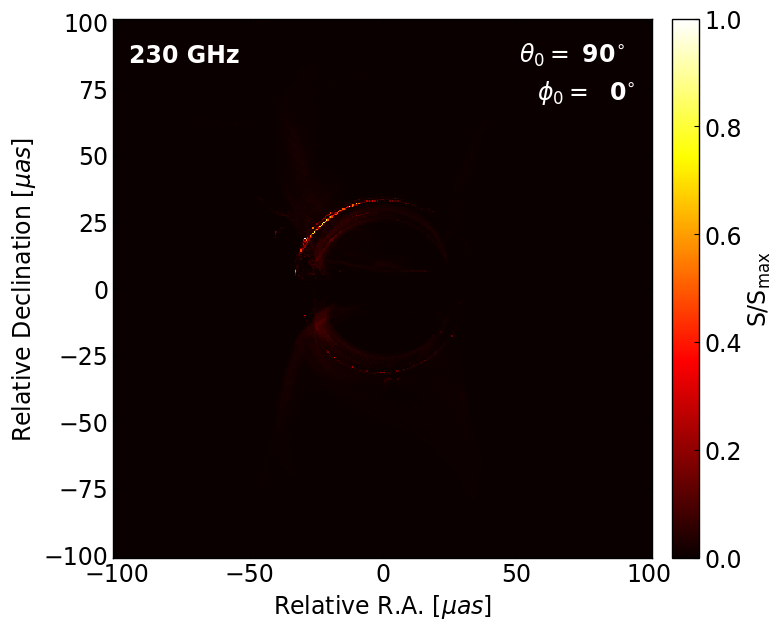

In [34]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [2]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%s%d.dat" \
        %(Rhigh,inclination,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh=1

In [4]:
ind,time,z_tot,dscale = bhoss_avg(1, 10, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 1.922729 at 9008.689295
641, flux: 1.926437 at 9014.196155
642, flux: 1.927936 at 9025.197202
643, flux: 1.935751 at 9036.191861
644, flux: 1.965320 at 9047.179248
645, flux: 1.991905 at 9058.195251
646, flux: 2.001697 at 9063.697016
647, flux: 2.017621 at 9074.704992
648, flux: 2.027120 at 9085.701679
649, flux: 2.033881 at 9096.689234
650, flux: 2.035103 at 9107.679785
651, flux: 2.013130 at 9118.661631
652, flux: 2.006344 at 9124.150162
653, flux: 2.042289 at 9135.137384
654, flux: 2.049767 at 9146.117533
655, flux: 2.042830 at 9157.096020
656, flux: 2.065702 at 9168.076667
657, flux: 2.068398 at 9173.556786
658, flux: 2.075857 at 9184.542398
659, flux: 2.074344 at 9195.521032
660, flux: 2.046955 at 9206.470801
661, flux: 2.029538 at 9217.433929
662, flux: 2.021924 at 9228.418806
663, flux: 2.032539 at 9233.902779
664, flux: 2.035888

In [5]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [6]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 1.954324 Jy, the density scale = 1.250000e-16


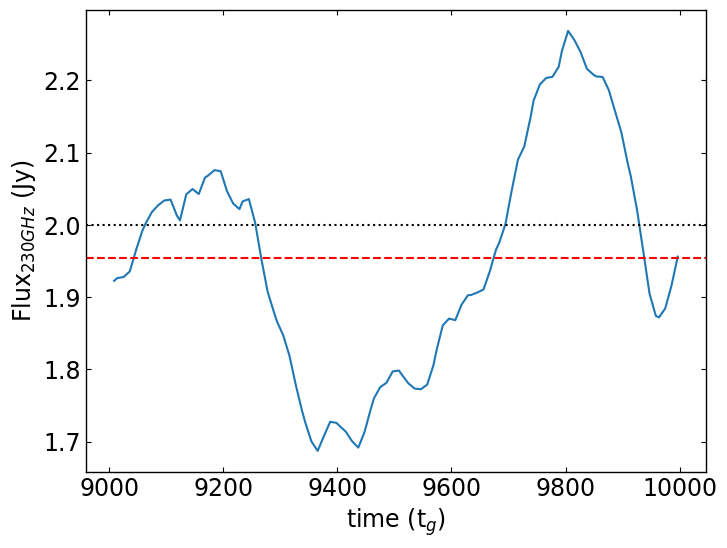

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [3]:
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.013419 at 9008.689295
641, flux: 2.003697 at 9014.196155
642, flux: 1.974042 at 9025.197202
643, flux: 1.956044 at 9036.191861
644, flux: 1.965422 at 9047.179248
645, flux: 1.959908 at 9058.195251
646, flux: 1.949529 at 9063.697016
647, flux: 1.931414 at 9074.704992
648, flux: 1.918170 at 9085.701679
649, flux: 1.949457 at 9096.689234
650, flux: 2.012114 at 9107.679785
651, flux: 2.029146 at 9118.661631
652, flux: 2.036503 at 9124.150162
653, flux: 2.096972 at 9135.137384
654, flux: 2.098585 at 9146.117533
655, flux: 2.084084 at 9157.096020
656, flux: 2.131132 at 9168.076667
657, flux: 2.139589 at 9173.556786
658, flux: 2.162523 at 9184.542398
659, flux: 2.176495 at 9195.521032
660, flux: 2.156603 at 9206.470801
661, flux: 2.145989 at 9217.433929
662, flux: 2.147247 at 9228.418806
663, flux: 2.168940 at 9233.902779
664, flux: 2.211917

In [4]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [5]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.053968 Jy, the density scale = 1.300000e-16


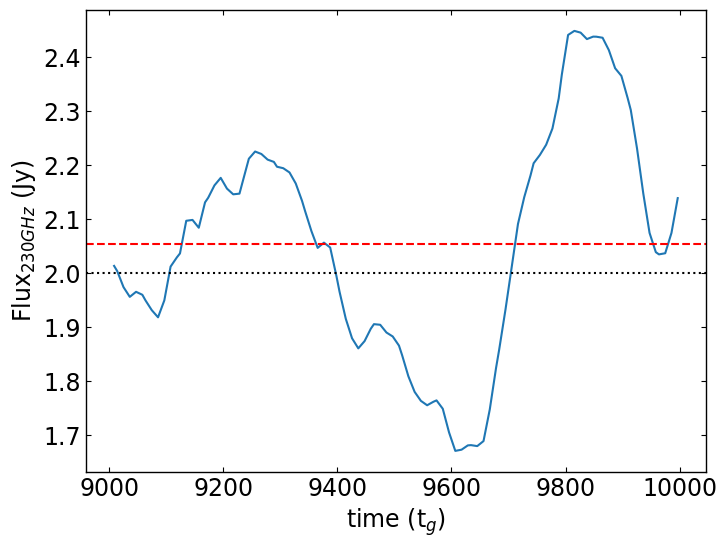

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [7]:
ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.058100 at 9008.689295
641, flux: 2.064341 at 9014.196155
642, flux: 1.994009 at 9025.197202
643, flux: 1.889245 at 9036.191861
644, flux: 1.798388 at 9047.179248
645, flux: 1.791669 at 9058.195251
646, flux: 1.803216 at 9063.697016
647, flux: 1.844111 at 9074.704992
648, flux: 1.869986 at 9085.701679
649, flux: 1.956882 at 9096.689234
650, flux: 2.059548 at 9107.679785
651, flux: 2.050210 at 9118.661631
652, flux: 2.056295 at 9124.150162
653, flux: 2.164814 at 9135.137384
654, flux: 2.245258 at 9146.117533
655, flux: 2.272103 at 9157.096020
656, flux: 2.257518 at 9168.076667
657, flux: 2.227719 at 9173.556786
658, flux: 2.203452 at 9184.542398
659, flux: 2.143554 at 9195.521032
660, flux: 2.082327 at 9206.470801
661, flux: 2.096987 at 9217.433929
662, flux: 2.100624 at 9228.418806
663, flux: 2.129361 at 9233.902779
664, flux: 2.135052

In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 1.926229 Jy, the density scale = 1.330000e-16


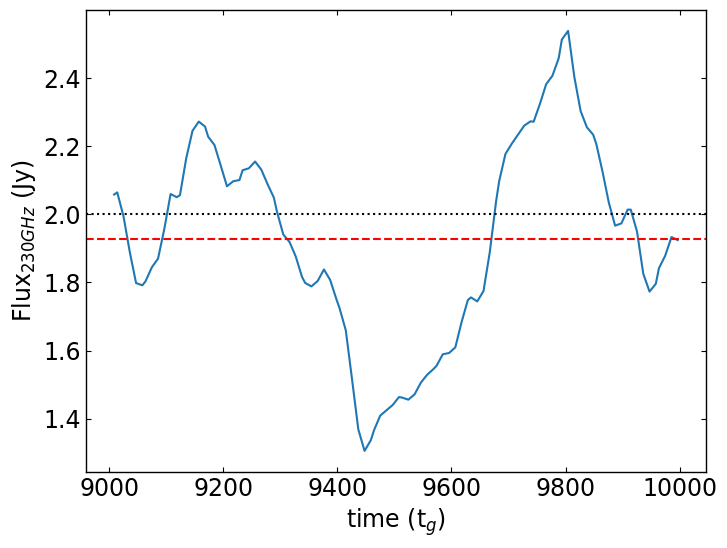

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh = 40

In [11]:
ind,time,z_tot,dscale = bhoss_avg(40, 10, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.055918 at 9008.689295
641, flux: 2.025110 at 9014.196155
642, flux: 2.025248 at 9025.197202
643, flux: 1.949730 at 9036.191861
644, flux: 2.099625 at 9047.179248
645, flux: 1.778570 at 9058.195251
646, flux: 1.761357 at 9063.697016
647, flux: 1.709696 at 9074.704992
648, flux: 1.667377 at 9085.701679
649, flux: 1.729858 at 9096.689234
650, flux: 1.765787 at 9107.679785
651, flux: 1.848527 at 9118.661631
652, flux: 1.917248 at 9124.150162
653, flux: 2.213476 at 9135.137384
654, flux: 1.909335 at 9146.117533
655, flux: 1.824900 at 9157.096020
656, flux: 1.863640 at 9168.076667
657, flux: 1.892559 at 9173.556786
658, flux: 1.973564 at 9184.542398
659, flux: 1.983777 at 9195.521032
660, flux: 1.907350 at 9206.470801
661, flux: 1.923759 at 9217.433929
662, flux: 1.847540 at 9228.418806
663, flux: 1.768634 at 9233.902779
664, flux: 1.79660

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.099628 Jy, the density scale = 4.500000e-14


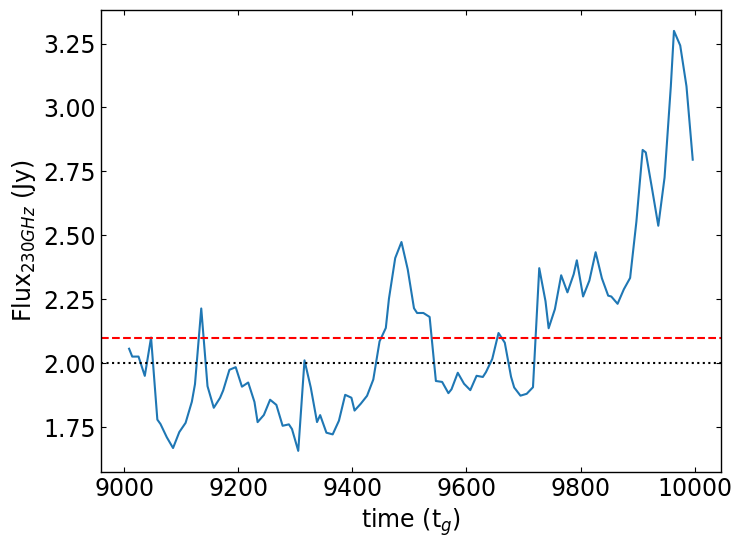

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [15]:
ind,time,z_tot,dscale = bhoss_avg(40, 50, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.027286 at 9008.689295
641, flux: 1.983319 at 9014.196155
642, flux: 1.901938 at 9025.197202
643, flux: 1.796045 at 9036.191861
644, flux: 1.847264 at 9047.179248
645, flux: 1.589266 at 9058.195251
646, flux: 1.576646 at 9063.697016
647, flux: 1.605391 at 9074.704992
648, flux: 1.577506 at 9085.701679
649, flux: 1.592307 at 9096.689234
650, flux: 1.659163 at 9107.679785
651, flux: 1.815838 at 9118.661631
652, flux: 1.848240 at 9124.150162
653, flux: 2.160687 at 9135.137384
654, flux: 1.789042 at 9146.117533
655, flux: 1.748305 at 9157.096020
656, flux: 1.755422 at 9168.076667
657, flux: 1.722496 at 9173.556786
658, flux: 1.859192 at 9184.542398
659, flux: 1.949190 at 9195.521032
660, flux: 1.710641 at 9206.470801
661, flux: 1.753515 at 9217.433929
662, flux: 1.655501 at 9228.418806
663, flux: 1.631719 at 9233.902779
664, flux: 1.76637

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 1.923186 Jy, the density scale = 3.700000e-14


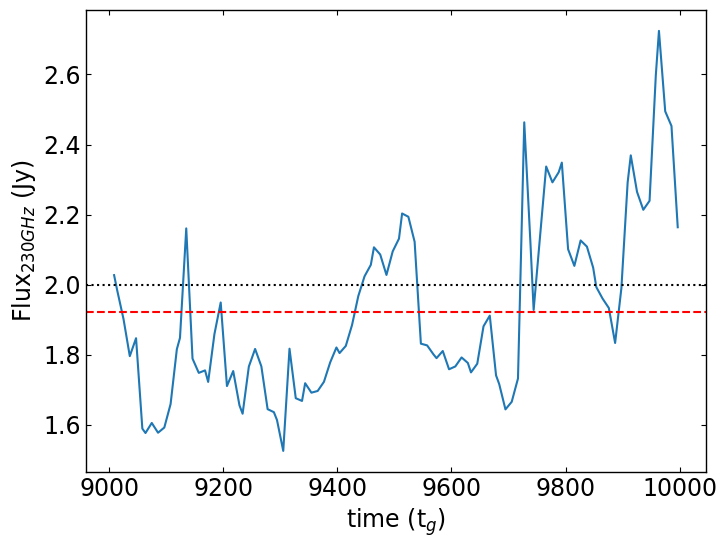

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
ind,time,z_tot,dscale = bhoss_avg(40, 90, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 1.917131 at 9008.689295
641, flux: 1.884351 at 9014.196155
642, flux: 1.885848 at 9025.197202
643, flux: 1.817381 at 9036.191861
644, flux: 1.777197 at 9047.179248
645, flux: 1.797620 at 9058.195251
646, flux: 1.712528 at 9063.697016
647, flux: 1.977778 at 9074.704992
648, flux: 1.748496 at 9085.701679
649, flux: 1.850668 at 9096.689234
650, flux: 1.892159 at 9107.679785
651, flux: 2.018291 at 9118.661631
652, flux: 1.886118 at 9124.150162
653, flux: 2.084024 at 9135.137384
654, flux: 2.011435 at 9146.117533
655, flux: 1.677753 at 9157.096020
656, flux: 1.724592 at 9168.076667
657, flux: 1.738119 at 9173.556786
658, flux: 1.915242 at 9184.542398
659, flux: 2.007857 at 9195.521032
660, flux: 1.774718 at 9206.470801
661, flux: 1.818329 at 9217.433929
662, flux: 1.779926 at 9228.418806
663, flux: 1.773273 at 9233.902779
664, flux: 1.82662

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.020376 Jy, the density scale = 4.300000e-14


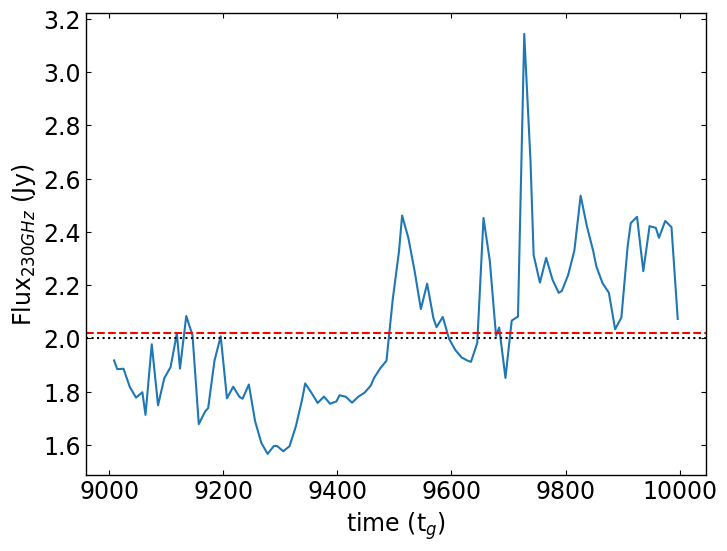

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh = 160

In [23]:
ind,time,z_tot,dscale = bhoss_avg(160, 10, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 1.855459 at 9008.689295
641, flux: 1.824887 at 9014.196155
642, flux: 1.823201 at 9025.197202
643, flux: 1.768612 at 9036.191861
644, flux: 1.792769 at 9047.179248
645, flux: 1.785803 at 9058.195251
646, flux: 1.758091 at 9063.697016
647, flux: 1.733791 at 9074.704992
648, flux: 1.685144 at 9085.701679
649, flux: 1.718447 at 9096.689234
650, flux: 1.786585 at 9107.679785
651, flux: 1.863083 at 9118.661631
652, flux: 1.955355 at 9124.150162
653, flux: 2.005760 at 9135.137384
654, flux: 1.908775 at 9146.117533
655, flux: 1.878024 at 9157.096020
656, flux: 1.879126 at 9168.076667
657, flux: 1.892378 at 9173.556786
658, flux: 1.934083 at 9184.542398
659, flux: 1.929585 at 9195.521032
660, flux: 1.916873 at 9206.470801
661, flux: 1.908700 at 9217.433929
662, flux: 1.900228 at 9228.418806
663, flux: 1.873316 at 9233.902779
664, flux: 1.8772

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.020891 Jy, the density scale = 7.680000e-14


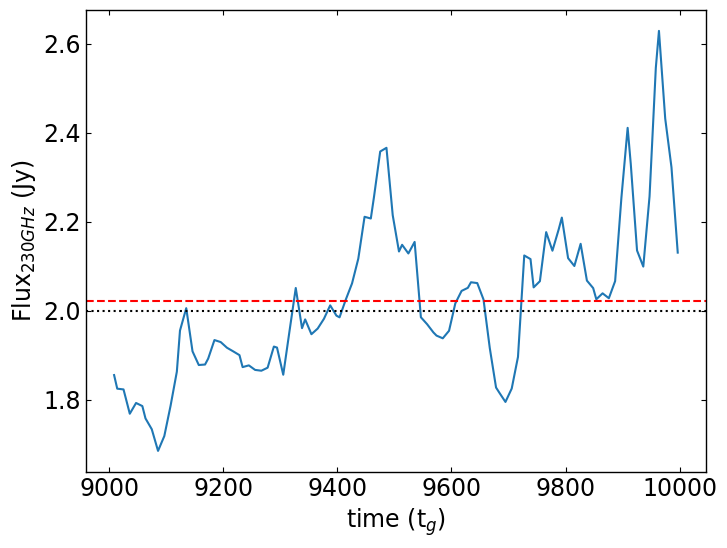

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [27]:
ind,time,z_tot,dscale = bhoss_avg(160, 50, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.043230 at 9008.689295
641, flux: 2.058256 at 9014.196155
642, flux: 2.037029 at 9025.197202
643, flux: 1.934252 at 9036.191861
644, flux: 1.987149 at 9047.179248
645, flux: 1.872973 at 9058.195251
646, flux: 1.872190 at 9063.697016
647, flux: 1.832315 at 9074.704992
648, flux: 1.809930 at 9085.701679
649, flux: 1.777086 at 9096.689234
650, flux: 1.850020 at 9107.679785
651, flux: 2.052057 at 9118.661631
652, flux: 2.112840 at 9124.150162
653, flux: 2.313333 at 9135.137384
654, flux: 2.046360 at 9146.117533
655, flux: 2.044317 at 9157.096020
656, flux: 2.032562 at 9168.076667
657, flux: 1.994075 at 9173.556786
658, flux: 2.009939 at 9184.542398
659, flux: 1.931739 at 9195.521032
660, flux: 1.801130 at 9206.470801
661, flux: 1.834807 at 9217.433929
662, flux: 1.841178 at 9228.418806
663, flux: 1.834767 at 9233.902779
664, flux: 1.9285

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.113145 Jy, the density scale = 6.600000e-14


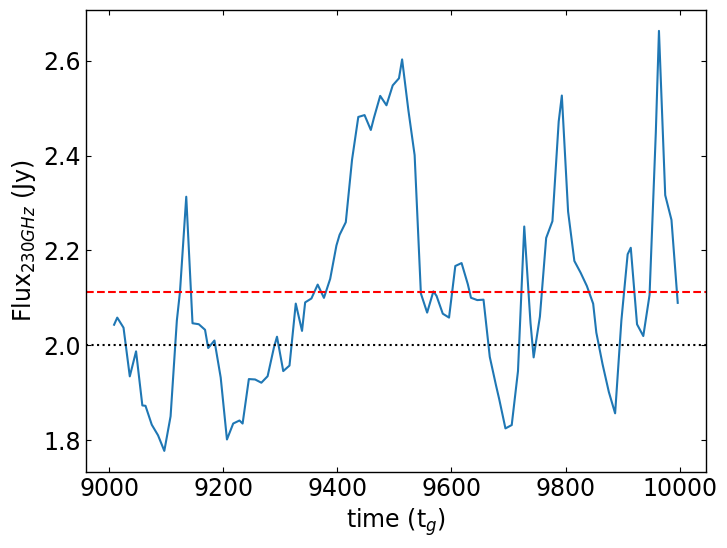

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
ind,time,z_tot,dscale = bhoss_avg(160, 90, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 1.884640 at 9008.689295
641, flux: 1.852795 at 9014.196155
642, flux: 1.824119 at 9025.197202
643, flux: 1.734431 at 9036.191861
644, flux: 1.761754 at 9047.179248
645, flux: 1.741504 at 9058.195251
646, flux: 1.740602 at 9063.697016
647, flux: 1.871856 at 9074.704992
648, flux: 1.796964 at 9085.701679
649, flux: 1.834963 at 9096.689234
650, flux: 1.939456 at 9107.679785
651, flux: 2.034375 at 9118.661631
652, flux: 2.019757 at 9124.150162
653, flux: 2.071572 at 9135.137384
654, flux: 1.826842 at 9146.117533
655, flux: 1.780463 at 9157.096020
656, flux: 1.766862 at 9168.076667
657, flux: 1.761302 at 9173.556786
658, flux: 1.812786 at 9184.542398
659, flux: 1.847434 at 9195.521032
660, flux: 1.738315 at 9206.470801
661, flux: 1.847286 at 9217.433929
662, flux: 1.812266 at 9228.418806
663, flux: 1.817140 at 9233.902779
664, flux: 1.8393

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.024633 Jy, the density scale = 7.450000e-14


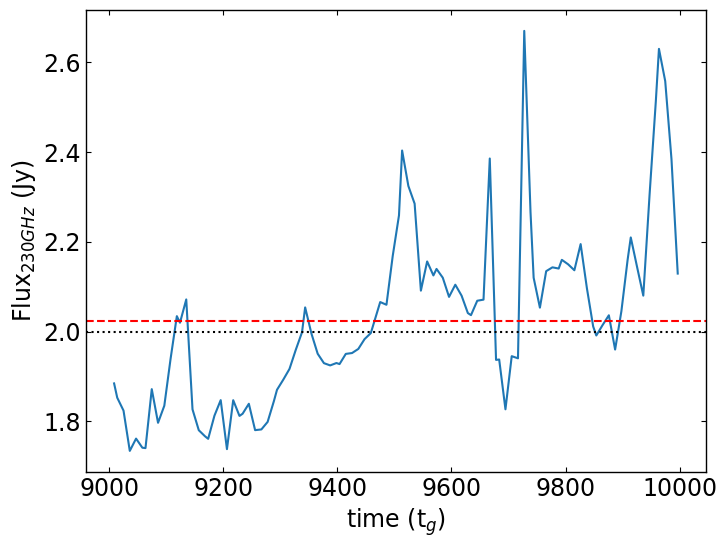

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))